<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/TF_4_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%95%99%EC%8A%B5_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

def vectorize_seq(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.

  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2가지의 모델 설정

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(10000,), name='input'),
                      Dense(16, activation='relu', name='hidden'),
                      Dense(1, activation='sigmoid', name='output')])

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(10000,), name='input2'),
                      Dense(7, activation='relu', name='hidden2'),
                      Dense(1, activation='sigmoid', name='output2')])

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 7)                 70007     
                                                                 
 hidden2 (Dense)             (None, 7)                 56        
                                                                 
 output2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 70,071
Trainable params: 70,071
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])


#### 2개의 모델 학습

In [ ]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 5s 81ms/step - loss: 0.5066 - acc: 0.7912 - val_loss: 0.4052 - val_acc: 0.8349
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3585 - acc: 0.8553 - val_loss: 0.3598 - val_acc: 0.8466
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3276 - acc: 0.8657 - val_loss: 0.3356 - val_acc: 0.8579
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3145 - acc: 0.8705 - val_loss: 0.3518 - val_acc: 0.8502
Epoch 5/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3094 - acc: 0.8719 - val_loss: 0.3489 - val_acc: 0.8507
Epoch 6/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3080 - acc: 0.8702 - val_loss: 0.3309 - val_acc: 0.8592
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3037 - acc: 0.8716 - val_loss: 0.3402 - val_acc: 0.8541
Epoch 8/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3006 - a

In [ ]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 57ms/step - loss: 0.5792 - acc: 0.7702 - val_loss: 0.4833 - val_acc: 0.8338
Epoch 2/20
49/49 [==============================] - 2s 45ms/step - loss: 0.4233 - acc: 0.8482 - val_loss: 0.3886 - val_acc: 0.8498
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3586 - acc: 0.8601 - val_loss: 0.3509 - val_acc: 0.8583
Epoch 4/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3297 - acc: 0.8660 - val_loss: 0.3340 - val_acc: 0.8606
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3155 - acc: 0.8720 - val_loss: 0.3335 - val_acc: 0.8592
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3079 - acc: 0.8728 - val_loss: 0.3261 - val_acc: 0.8629
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3033 - acc: 0.8751 - val_loss: 0.3264 - val_acc: 0.8616
Epoch 8/20
49/49 [==============================] - 2s 51ms/step - loss: 0.2999 - a

#### 비교

In [ ]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

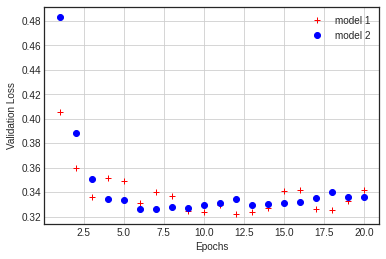

In [ ]:
plt.plot(epochs, model_1_val_loss, 'r+', label='model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [ ]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(10000,), name='input3'),
                      Dense(1024, activation='relu', name='hidden3'),
                      Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [ ]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 37s 739ms/step - loss: 0.5580 - acc: 0.7471 - val_loss: 0.4230 - val_acc: 0.8039
Epoch 2/20
49/49 [==============================] - 35s 715ms/step - loss: 0.3550 - acc: 0.8439 - val_loss: 0.3298 - val_acc: 0.8540
Epoch 3/20
49/49 [==============================] - 35s 714ms/step - loss: 0.3122 - acc: 0.8662 - val_loss: 0.3771 - val_acc: 0.8402
Epoch 4/20
49/49 [==============================] - 34s 703ms/step - loss: 0.2651 - acc: 0.8918 - val_loss: 0.3760 - val_acc: 0.8551
Epoch 5/20
49/49 [==============================] - 36s 731ms/step - loss: 0.1835 - acc: 0.9284 - val_loss: 0.6786 - val_acc: 0.7438
Epoch 6/20
49/49 [==============================] - 35s 716ms/step - loss: 0.1067 - acc: 0.9623 - val_loss: 0.4247 - val_acc: 0.8598
Epoch 7/20
49/49 [==============================] - 35s 709ms/step - loss: 0.0740 - acc: 0.9814 - val_loss: 0.4864 - val_acc: 0.8575
Epoch 8/20
49/49 [==============================] - 35s 711ms/step - 

#### 시각화

In [ ]:
model_3_val_loss = model_3_hist.history['val_loss']


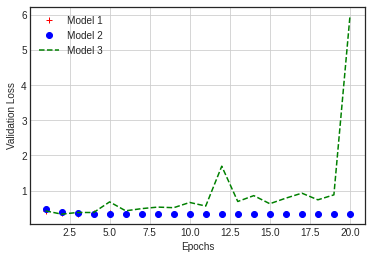

In [ ]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model 3')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

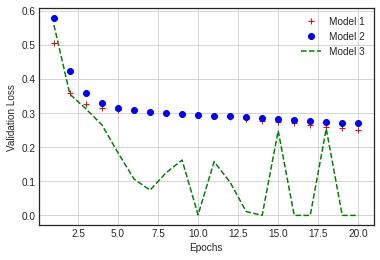

In [ ]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label='Model 3')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [ ]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10,10]),
                    LeakyReLU(alpha=0.2),
                    Dense(1, kernel_initializer='he_normal'),
                    Activation("softmax")])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10, 30)            330       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10, 30)            0         
                                                                 
 dense_3 (Dense)             (None, 10, 1)             31        
                                                                 
 activation_1 (Activation)   (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [ ]:
from tensorflow.keras.optimizers import Adagrad

In [ ]:
optimizer = Adagrad(learning_rate=0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


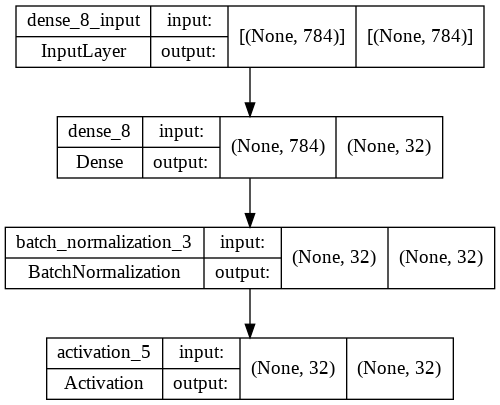

In [ ]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes=True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                160016    
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


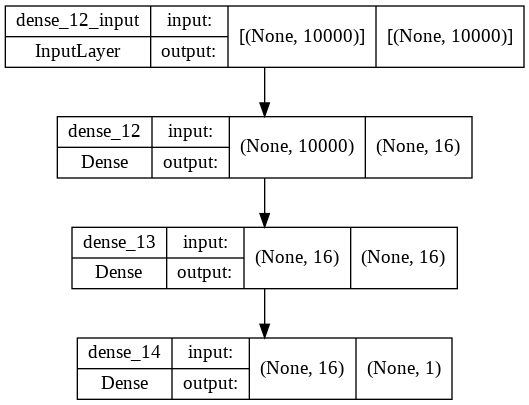

In [ ]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(10000,)),
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes=True)

#### 모델 학습

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 107ms/step - loss: 0.5364 - acc: 0.7905 - val_loss: 0.4289 - val_acc: 0.8462
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3923 - acc: 0.8526 - val_loss: 0.3776 - val_acc: 0.8537
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3551 - acc: 0.8654 - val_loss: 0.3624 - val_acc: 0.8576
Epoch 4/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3442 - acc: 0.8702 - val_loss: 0.3529 - val_acc: 0.8620
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3369 - acc: 0.8711 - val_loss: 0.3516 - val_acc: 0.8622
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3351 - acc: 0.8698 - val_loss: 0.3736 - val_acc: 0.8514
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3354 - acc: 0.8708 - val_loss: 0.3596 - val_acc: 0.8578
Epoch 8/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3331 - 

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

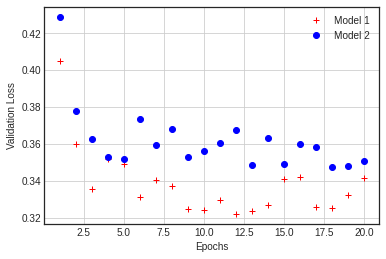

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model 2')


plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1과 비교

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160016    
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


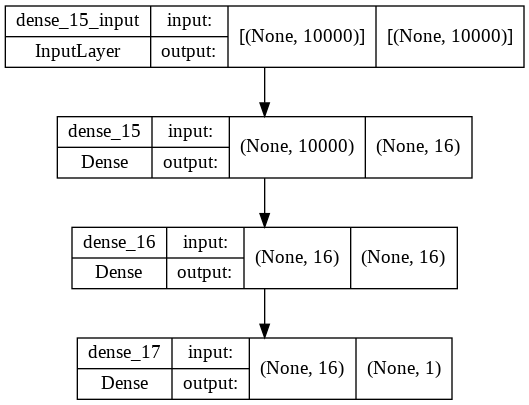

In [ ]:
l1_model = Sequential([Dense(16, kernel_regularizer=l2(0.0001), activation='relu', input_shape=(10000,)),
                       Dense(16, kernel_regularizer=l2(0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes=True)

In [ ]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 97ms/step - loss: 0.5323 - acc: 0.7702 - val_loss: 0.4091 - val_acc: 0.8502
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3699 - acc: 0.8572 - val_loss: 0.3736 - val_acc: 0.8406
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3348 - acc: 0.8631 - val_loss: 0.3332 - val_acc: 0.8615
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3218 - acc: 0.8677 - val_loss: 0.3312 - val_acc: 0.8613
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3144 - acc: 0.8718 - val_loss: 0.3286 - val_acc: 0.8612
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3112 - acc: 0.8731 - val_loss: 0.3331 - val_acc: 0.8589
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3078 - acc: 0.8737 - val_loss: 0.3464 - val_acc: 0.8533
Epoch 8/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3071 - a

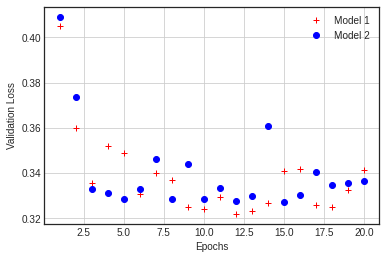

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo', label='Model 2')


plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                160016    
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


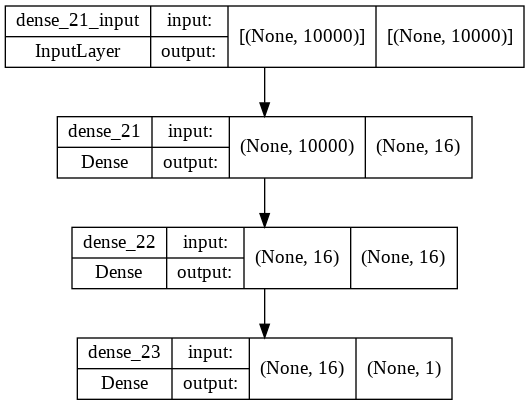

In [ ]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(10000,)),
                       Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes=True)

#### L1, L2와 비교

In [ ]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 83ms/step - loss: 0.5548 - acc: 0.7880 - val_loss: 0.4492 - val_acc: 0.8304
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.4009 - acc: 0.8571 - val_loss: 0.3801 - val_acc: 0.8602
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3668 - acc: 0.8662 - val_loss: 0.3733 - val_acc: 0.8597
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3567 - acc: 0.8685 - val_loss: 0.3734 - val_acc: 0.8589
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3552 - acc: 0.8686 - val_loss: 0.3659 - val_acc: 0.8620
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3500 - acc: 0.8700 - val_loss: 0.3627 - val_acc: 0.8620
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3493 - acc: 0.8698 - val_loss: 0.3783 - val_acc: 0.8560
Epoch 8/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3484 - a

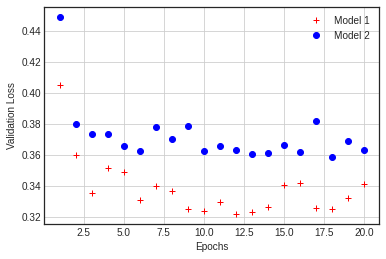

In [ ]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'bo', label='Model 2')


plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [ ]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                160016    
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


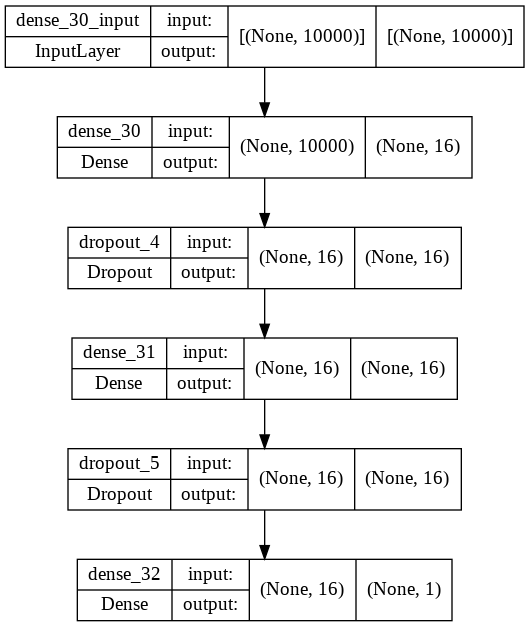

In [ ]:
dropout_model = Sequential([Dense(16, activation='relu', input_shape=(10000,)),
                            Dropout(0.5),
                            Dense(16, activation='relu'),
                            Dropout(0.5),
                            Dense(1, activation='sigmoid')])

dropout_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

dropout_model.summary()
plot_model(dropout_model, show_shapes=True)

#### 모델 학습

In [ ]:
dropout_model_hist = dropout_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 75ms/step - loss: 0.6095 - acc: 0.6746 - val_loss: 0.4908 - val_acc: 0.8394
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.4921 - acc: 0.7830 - val_loss: 0.3859 - val_acc: 0.8528
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.4355 - acc: 0.8185 - val_loss: 0.3503 - val_acc: 0.8610
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3996 - acc: 0.8397 - val_loss: 0.3281 - val_acc: 0.8631
Epoch 5/20
49/49 [==============================] - 2s 48ms/step - loss: 0.3822 - acc: 0.8484 - val_loss: 0.3222 - val_acc: 0.8625
Epoch 6/20
49/49 [==============================] - 3s 53ms/step - loss: 0.3670 - acc: 0.8537 - val_loss: 0.3205 - val_acc: 0.8619
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3534 - acc: 0.8597 - val_loss: 0.3191 - val_acc: 0.8617
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3420 - a

#### 시각화

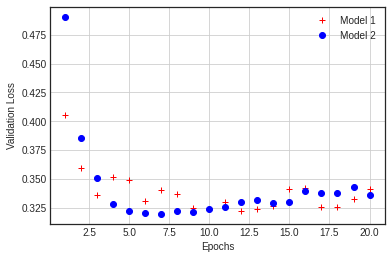

In [ ]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

epochs = range(1,21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Model 2')


plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()